## High Average Number of Different Products Sold Together for X

### Selection of X criteria4

In [50]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import math
import mplcursors

In [3]:
# Load data from the file
with open('/Users/wangchunfeng/study/thesis/data/sales.pkl', 'rb') as f:
    sales_rawdata = pickle.load(f)

df_sales = pd.DataFrame(sales_rawdata)

In [11]:
df_top100 = df_sales.groupby('product_id').size().nlargest(100).sort_values(ascending=False).reset_index().rename(columns={'index': 'product_id', 0: 'count'})

In [14]:
df_sales

,order_id,store_id,order_date,product_id,customer_id,product_name,sold_quantity,order_datetime
0,42160,0,2022-12-31,742,15213,Listerine blanqueante 500ml,2.0,2022-12-31 17:44:04+00:00
1,17111,0,2022-12-31,3834,19259,Agua Bezoya 1.5L,2.0,2022-12-31 08:38:14+00:00
2,17111,0,2022-12-31,779,19259,Carbonell Aceite de Oliva Suave 0.4º 1L,1.0,2022-12-31 08:38:14+00:00
3,17111,0,2022-12-31,475,19259,Zumo de naranja natural 0.5L,1.0,2022-12-31 08:38:14+00:00
4,17111,0,2022-12-31,4236,19259,Evax Compresa Cottonlike Alas 16u,1.0,2022-12-31 08:38:14+00:00
...,...,...,...,...,...,...,...,...
832603,1997,0,2023-01-28,1307,22736,Papel higiénico Scottex 16u,1.0,2023-01-28 15:07:32+00:00
832604,1997,0,2023-01-28,2314,22736,Coca-Cola Light Botella 2L,6.0,2023-01-28 15:07:32+00:00
832605,32690,0,2023-01-28,3069,14236,Monster Cookie XXL de Oreo,1.0,2023-01-28 20:00:42+00:00
832606,32690,0,2023-01-28,3208,14236,Monster Cookie XXL de Nutella,1.0,2023-01-28 20:00:42+00:00


In [39]:
products_sold_together = df_sales.groupby('order_id')['product_id'].nunique().reset_index()
products_sold_together.columns = ['order_id', 'products_sold_together']

# Step 2: Merge with the original df_sales dataset
merged_df = df_sales.merge(products_sold_together, on='order_id')

# Step 3: Group by product_id and calculate the average of the new column
average_products_sold_together = merged_df.groupby('product_id')['products_sold_together'].mean().reset_index()

average_products_sold_together = average_products_sold_together.sort_values(by='products_sold_together', ascending=False)

# Additional Step: Include count of orders per product_id
order_counts = df_sales.groupby('product_id')['order_id'].nunique().reset_index()
order_counts.columns = ['product_id', 'order_count']

average_products_sold_together = average_products_sold_together.merge(order_counts, on='product_id')
average_products_sold_together.columns = ['product_id', 'average_products_sold_together', 'order_count']

In [55]:
average_products_sold_together[average_products_sold_together['order_count']>4000]

,product_id,average_products_sold_together,order_count
1282,2668,9.015319,4678
2839,1307,7.067326,4242
3163,4144,6.350356,6161
3363,528,5.833665,4996
3380,667,5.775238,14096
3400,1279,5.693000,7945
3402,3834,5.686259,14756
3499,3523,5.368494,6420
3913,1280,3.980150,6195
3923,719,3.934755,4522


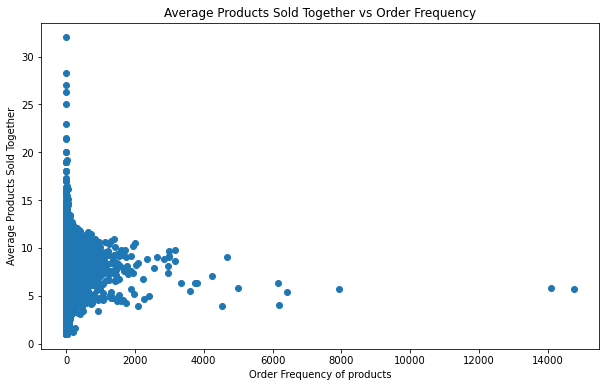

In [56]:
# Plotting the data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(average_products_sold_together['order_count'], average_products_sold_together['average_products_sold_together'])
plt.xlabel('Order Frequency of products')
plt.ylabel('Average Products Sold Together')
plt.title('Average Products Sold Together vs Order Frequency')

# Adding hover functionality
cursor = mplcursors.cursor(scatter, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"Product ID: {average_products_sold_together['product_id'][sel.target.index]}"))

# Displaying the plot
plt.show()